<a href="https://colab.research.google.com/github/Big-Shu-Nim/NLP/blob/main/C3_W3_Lab_2_multiple_layer_LSTM_0422_23(%EC%B5%9C%EC%A2%85%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_2_multiple_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코세라_자연어_3주차학습 :Multi-layers of LSTM  하다가 졸려서 퇴근
Scheduled: Apr 21, 2023 10:30 PM to 11:00 PM, GMT+9

코세라_자연어_3주차학습
Scheduled: Apr 22, 2023 10:00 AM to 10:40 AM, GMT+9

코세라_자연어_3주차학습
Scheduled: Apr 22, 2023 11:35 AM to 12:15 PM, GMT+9


# Ungraded Lab: Multiple LSTMs

In this lab, you will look at how to build a model with multiple LSTM layers. Since you know the preceding steps already (e.g. downloading datasets, preparing the data, etc.), we won't expound on it anymore so you can just focus on the model building code.

## Download and Prepare the Dataset

In [1]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2982T1/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2982T1/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2982T1/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Like the previous lab, we increased the `BATCH_SIZE` here to make the training faster. If you are doing this on your local machine and have a powerful processor, feel free to use the value used in the lecture (i.e. 64) to get the same results as Laurence.

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

## Build and Compile the Model

You can build multiple layer LSTM models by simply appending another `LSTM` layer in your `Sequential` model and enabling the `return_sequences` flag to `True`. This is because an `LSTM` layer expects a sequence input so if the previous layer is also an LSTM, then it should output a sequence as well. See the code cell below that demonstrates this flag in action. You'll notice that the output dimension is in 3 dimensions `(batch_size, timesteps, features)` when when `return_sequences` is True.

In [1]:
import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
#np.random.rand generates an array of random float values with the given shape.
print(f'shape of input array: {random_input.shape}')

# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8
shape of input array: (1, 20, 16)
shape of lstm output(return_sequences=False): (1, 8)
shape of lstm output(return_sequences=True): (1, 20, 8)


#Build and complie 코드북의 메시지
* return_sequences=False/True 유무에 따른 아웃풋 모양을 직접 보여주면서 이해를 돕고 있다. lstm를 여러개 쓸 경우 저렇게 true를 설정하여 타임스탭의 값을 전달해준다. 일반적인 출력층의 경우 단 하나의 값를 LSTM이 전달하기 때문에 이러한 값이 없다. LSTM 끼리는 3차원 보통 레이어는 2차원인가?

##Where are the random float values generated by np.random.rand stored in the code and how are they used?

* The random float values are generated by the np.random.rand function, and are stored in the random_input array. This array is used as the input to the LSTM layers to demonstrate how the model can handle sequence inputs. The random values are not important in this case, as they are only being used for demonstration purposes.

The next cell implements the stacked LSTM architecture.

In [4]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

## Does the use of return_sequences in the LSTM layer determine whether it is a single LSTM layer or not in the model presented in the following code?

* Yes, the use of the return_sequences=True flag in the first LSTM layer in your code indicates that the model is a multi-layer LSTM with two LSTM layers. If the flag were set to False, then the model would have only a single LSTM layer.

In [5]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the Model

The additional LSTM layer will lengthen the training time compared to the previous lab. Given the default parameters we set, it will take around 2 minutes per epoch with the Colab GPU enabled. 

In [6]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 66s 563ms/step - loss: 0.5945 - accuracy: 0.6703 - val_loss: 0.4984 - val_accuracy: 0.7746
Epoch 2/10
98/98 [==============================] - 49s 499ms/step - loss: 0.3965 - accuracy: 0.8287 - val_loss: 0.4324 - val_accuracy: 0.8048
Epoch 3/10
98/98 [==============================] - 47s 479ms/step - loss: 0.2937 - accuracy: 0.8836 - val_loss: 0.4586 - val_accuracy: 0.8242
Epoch 4/10
98/98 [==============================] - 45s 459ms/step - loss: 0.2235 - accuracy: 0.9180 - val_loss: 0.5005 - val_accuracy: 0.7678
Epoch 5/10
98/98 [==============================] - 43s 438ms/step - loss: 0.1731 - accuracy: 0.9398 - val_loss: 0.4959 - val_accuracy: 0.8360
Epoch 6/10
98/98 [==============================] - 42s 425ms/step - loss: 0.1347 - accuracy: 0.9537 - val_loss: 0.5326 - val_accuracy: 0.8072
Epoch 7/10
98/98 [==============================] - 43s 439ms/step - loss: 0.2310 - accuracy: 0.9055 - val_loss: 0.5188 - val_accuracy: 0.8022

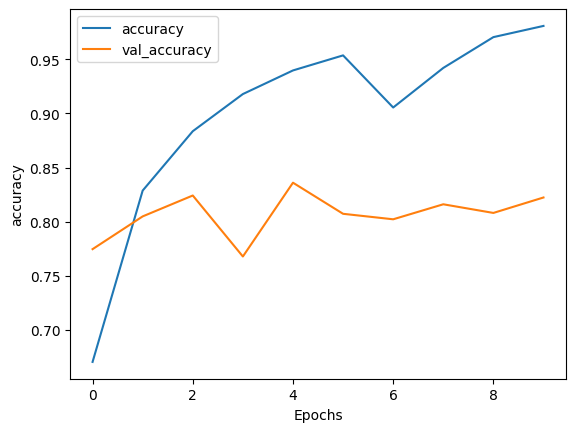

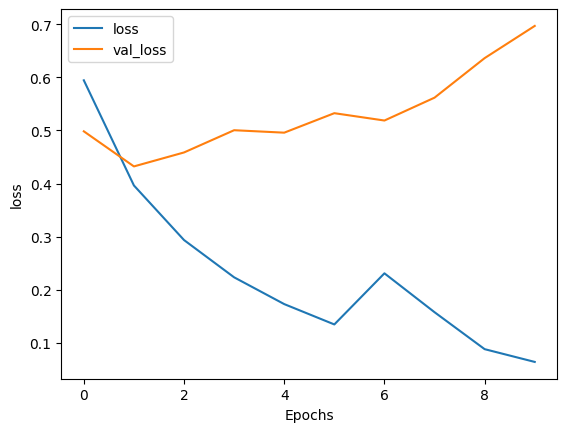

In [7]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## How can I improve my model if the validation loss keeps increasing towards the end and the accuracy remains stagnant at around 80%?



If your validation loss is increasing and your accuracy is stagnant, it may indicate that your model is overfitting to the training data. Here are a few strategies you can try to improve your model:

Reduce model complexity: Simplify your model architecture by reducing the number of layers or the number of units in each layer to reduce overfitting.

Add regularization: Regularization techniques such as L1/L2 regularization, dropout, or early stopping can help prevent overfitting by adding constraints to the model.

Increase training data: Adding more training data can help improve the generalization of your model and reduce overfitting.

Adjust hyperparameters: Try adjusting the learning rate, batch size, or optimizer to see if it improves performance.

Try different architectures: Experiment with different architectures such as adding more layers, using different activation functions, or using a different type of model altogether.

Remember to evaluate your model on the validation set frequently during training to monitor its performance and make adjustments as necessary.

## Wrap Up

This lab showed how you can build deep networks by stacking LSTM layers. In the next labs, you will continue exploring other architectures you can use to implement your sentiment classification model.